[MAP estimation] w0:-0.55, w1:0.55


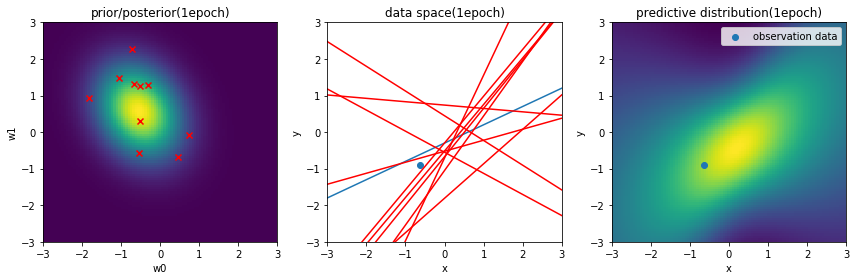

[MAP estimation] w0:-0.47, w1:0.38


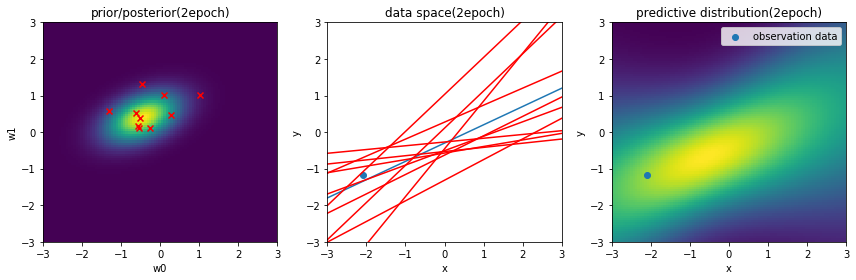

[MAP estimation] w0:-0.31, w1:0.51


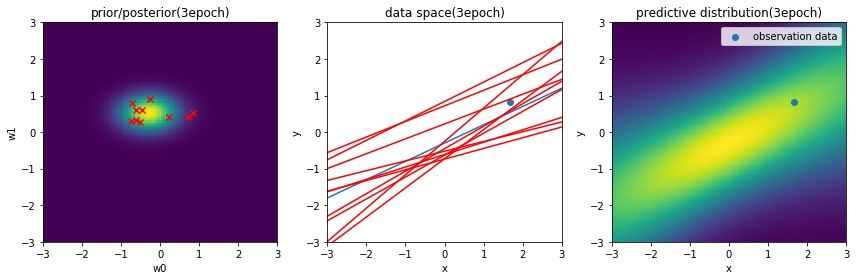

[MAP estimation] w0:-0.30, w1:0.51


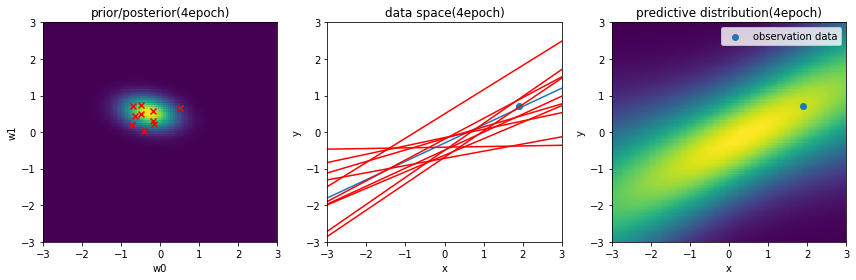

[MAP estimation] w0:-0.28, w1:0.51


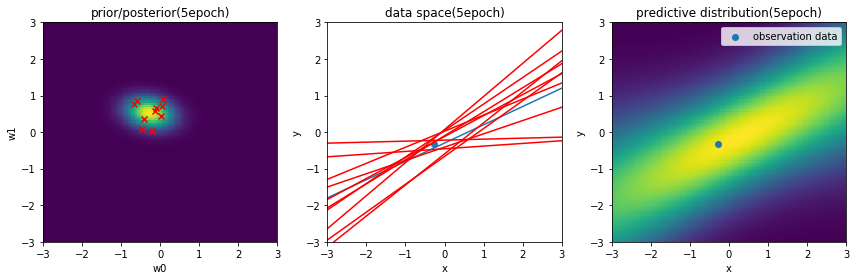

[MAP estimation] w0:-0.33, w1:0.55


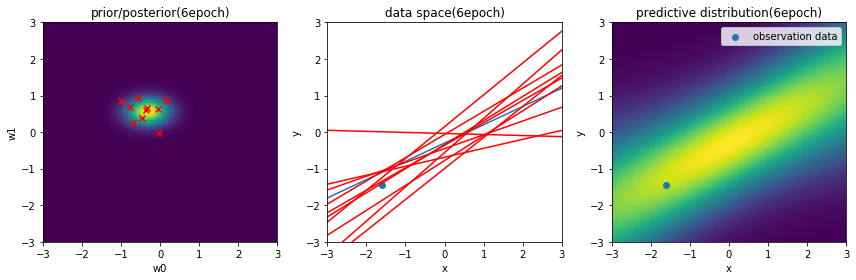

[MAP estimation] w0:-0.35, w1:0.56


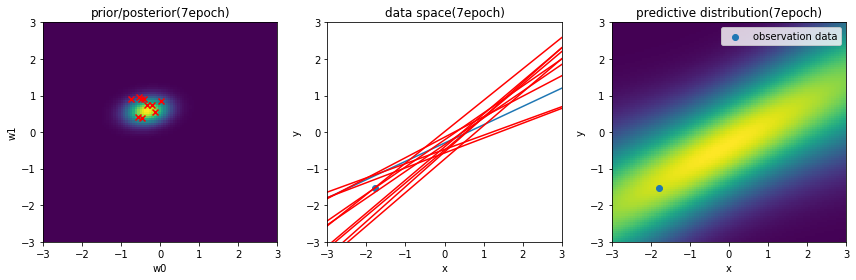

[MAP estimation] w0:-0.35, w1:0.56


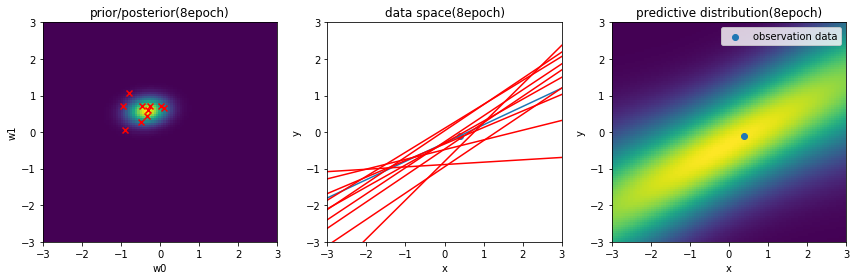

[MAP estimation] w0:-0.34, w1:0.58


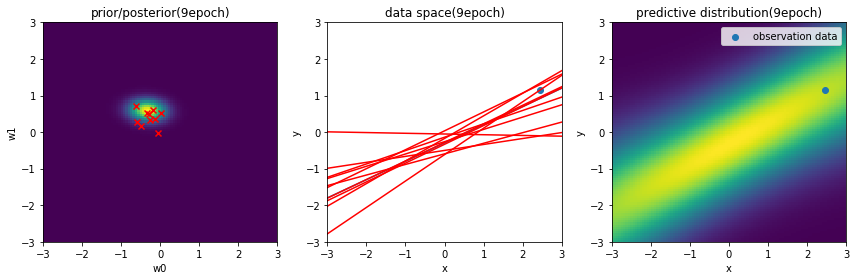

[MAP estimation] w0:-0.28, w1:0.56


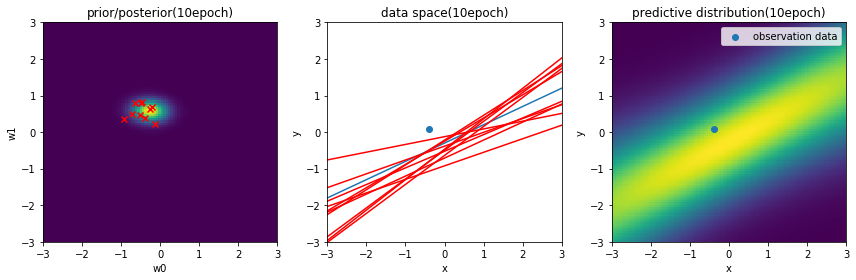

[MAP estimation] w0:-0.30, w1:0.55


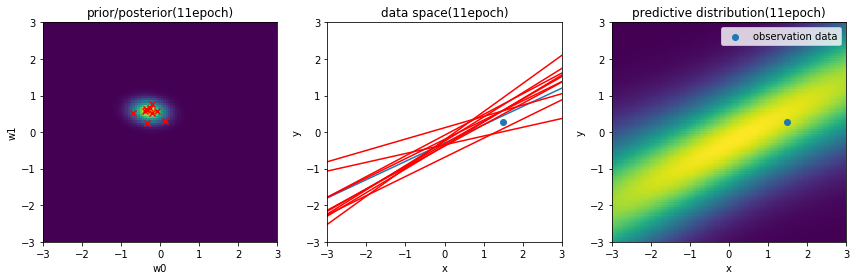

[MAP estimation] w0:-0.36, w1:0.58


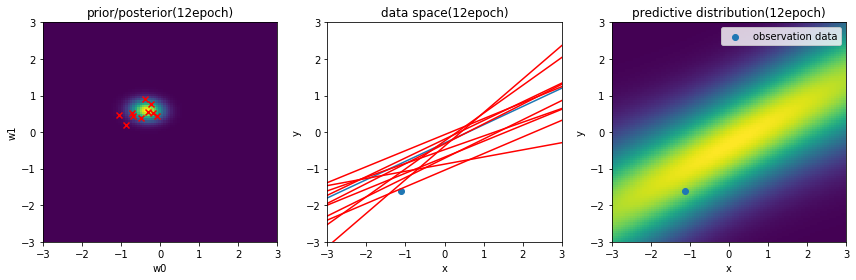

[MAP estimation] w0:-0.33, w1:0.60


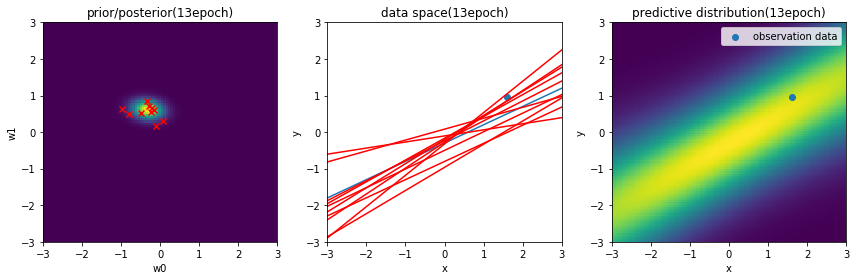

[MAP estimation] w0:-0.29, w1:0.56


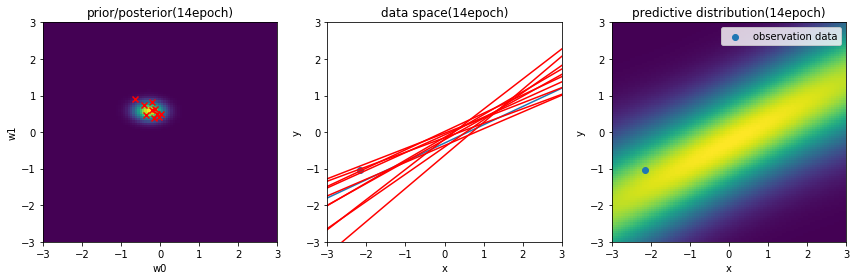

[MAP estimation] w0:-0.28, w1:0.55


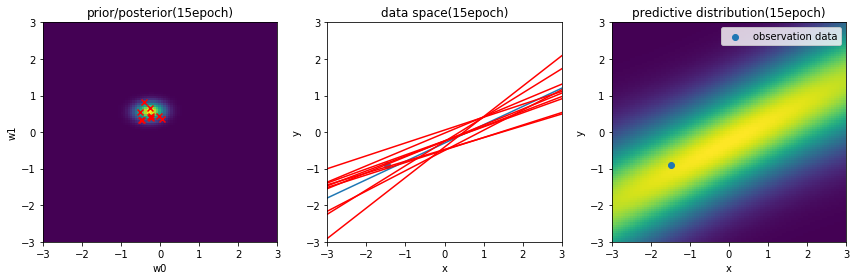

[MAP estimation] w0:-0.25, w1:0.52


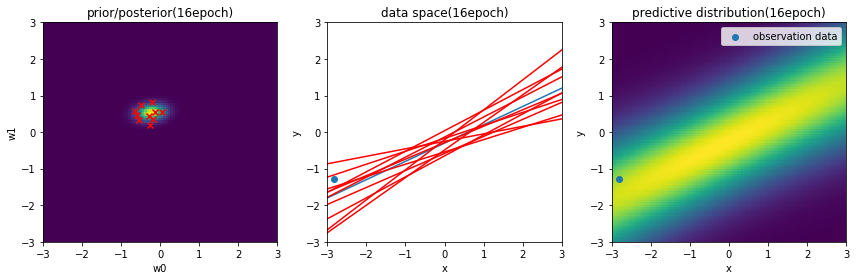

[MAP estimation] w0:-0.28, w1:0.49


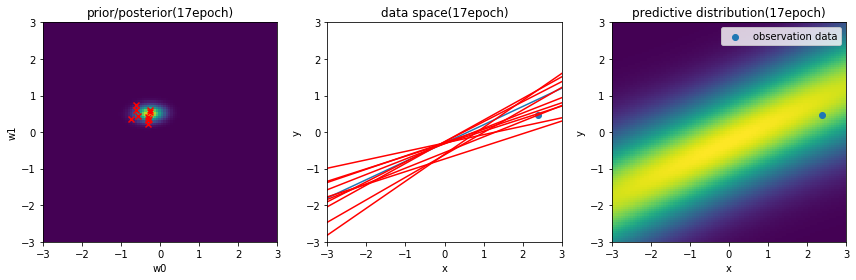

[MAP estimation] w0:-0.29, w1:0.49


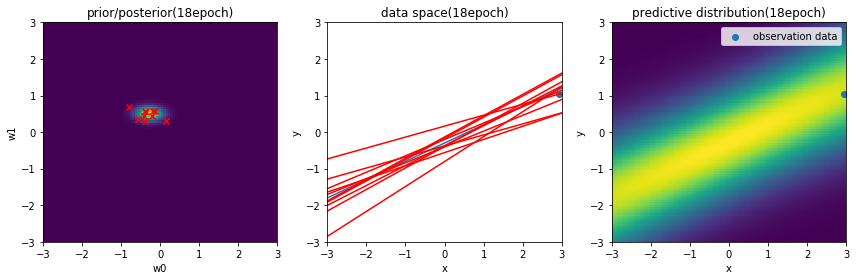

[MAP estimation] w0:-0.34, w1:0.53


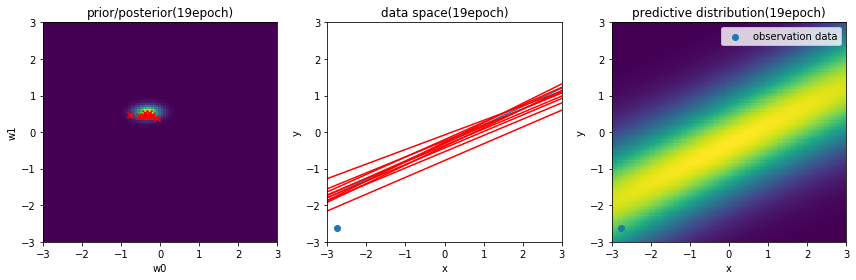

[MAP estimation] w0:-0.34, w1:0.52


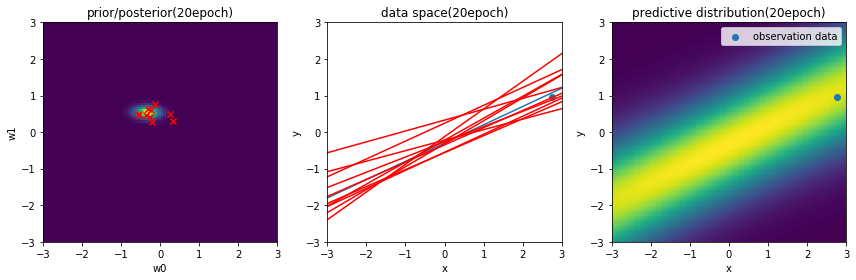

[MAP estimation] w0:-0.34, w1:0.52


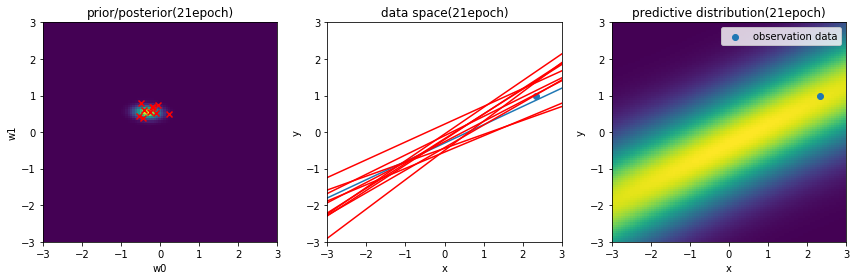

[MAP estimation] w0:-0.34, w1:0.52


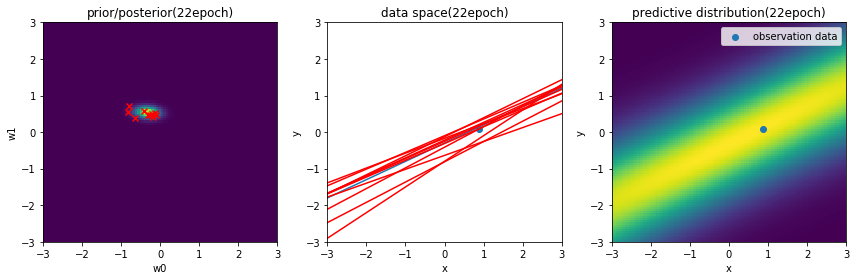

[MAP estimation] w0:-0.32, w1:0.51


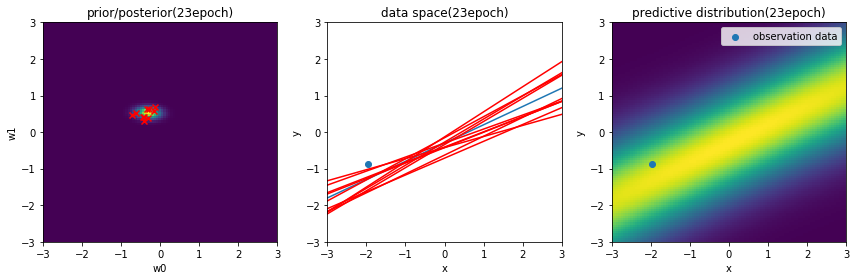

[MAP estimation] w0:-0.31, w1:0.50


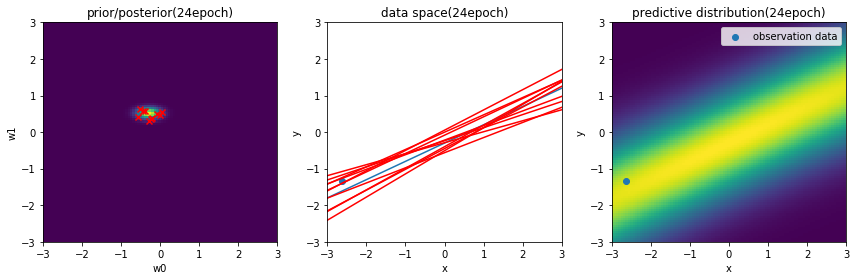

[MAP estimation] w0:-0.30, w1:0.50


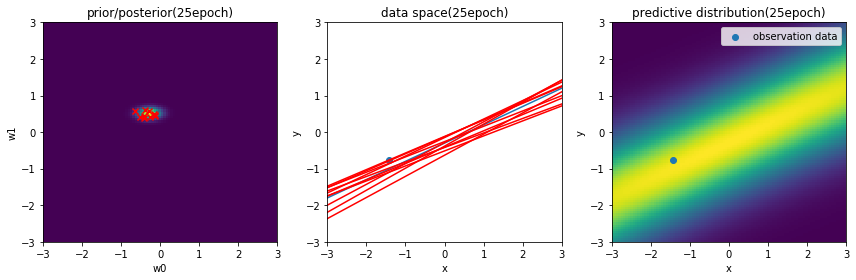

[MAP estimation] w0:-0.29, w1:0.50


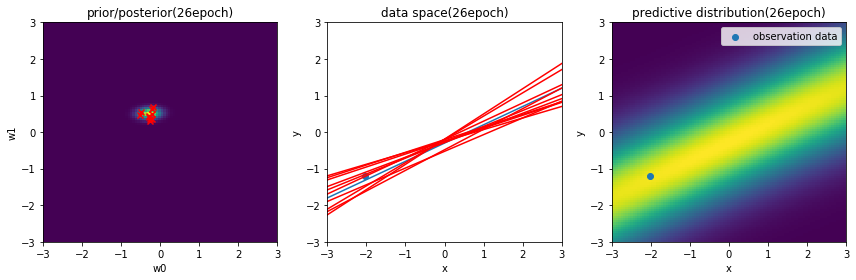

[MAP estimation] w0:-0.30, w1:0.50


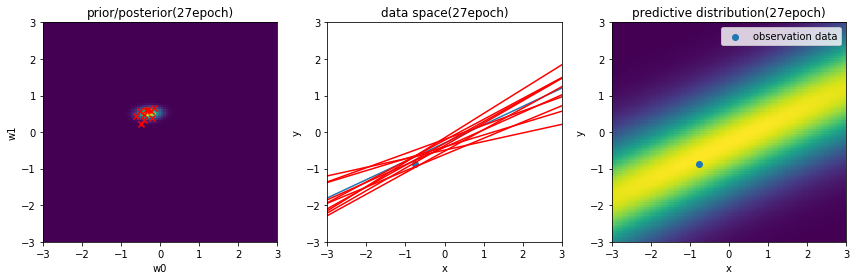

[MAP estimation] w0:-0.30, w1:0.50


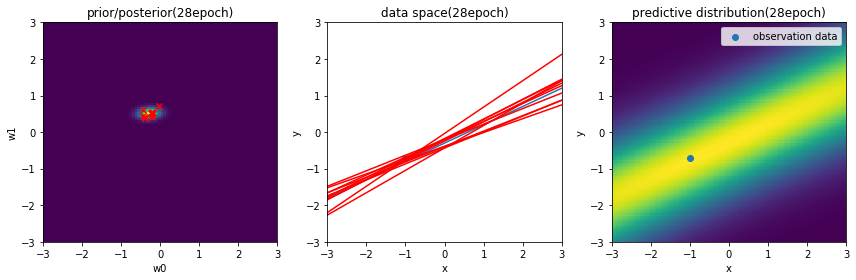

[MAP estimation] w0:-0.31, w1:0.50


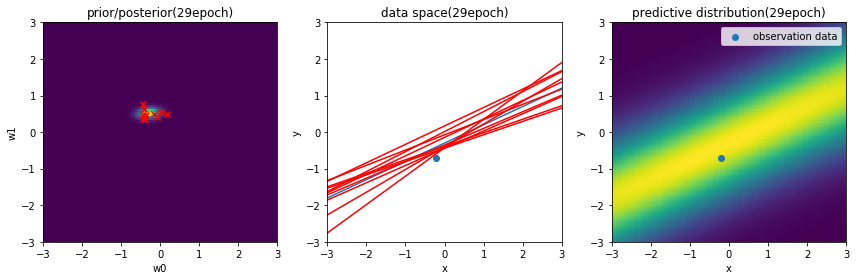

[MAP estimation] w0:-0.32, w1:0.49


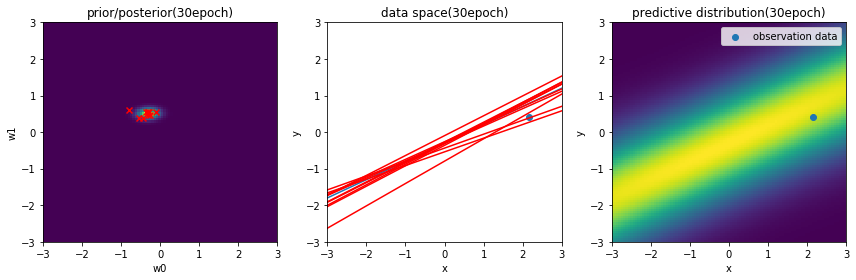

[MAP estimation] w0:-0.33, w1:0.49


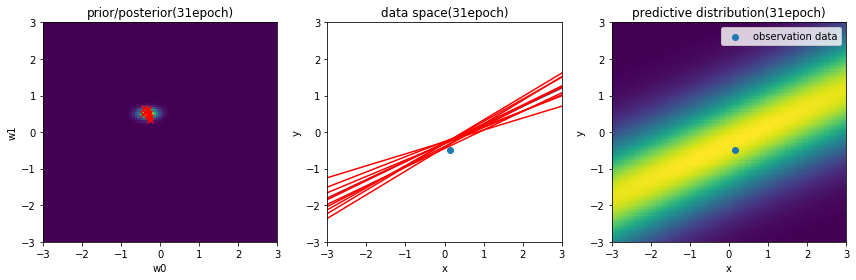

[MAP estimation] w0:-0.34, w1:0.49


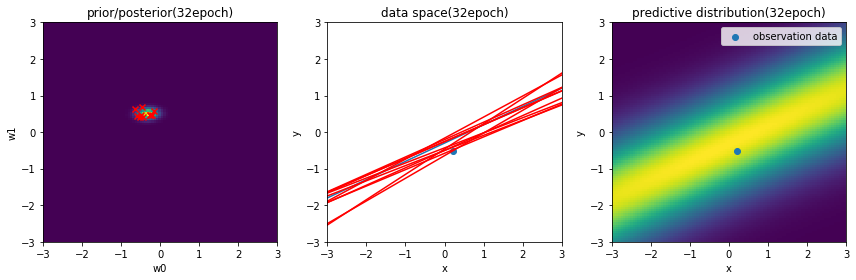

[MAP estimation] w0:-0.32, w1:0.49


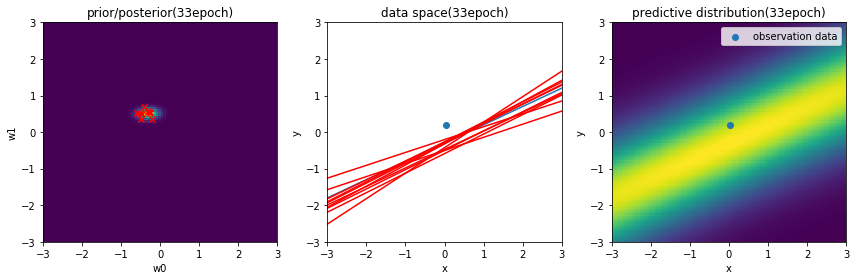

[MAP estimation] w0:-0.33, w1:0.48


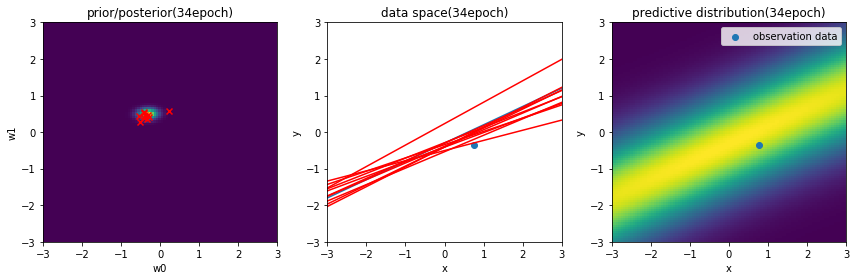

[MAP estimation] w0:-0.33, w1:0.48


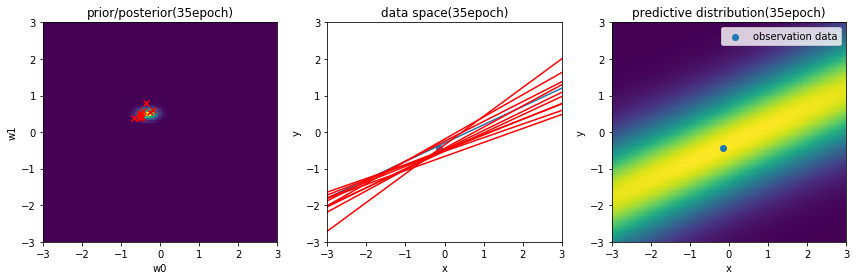

[MAP estimation] w0:-0.33, w1:0.48


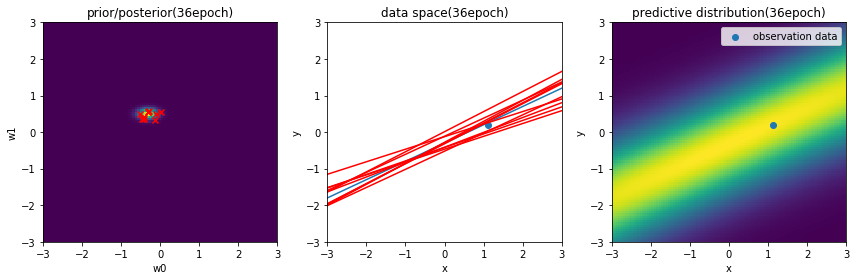

[MAP estimation] w0:-0.32, w1:0.49


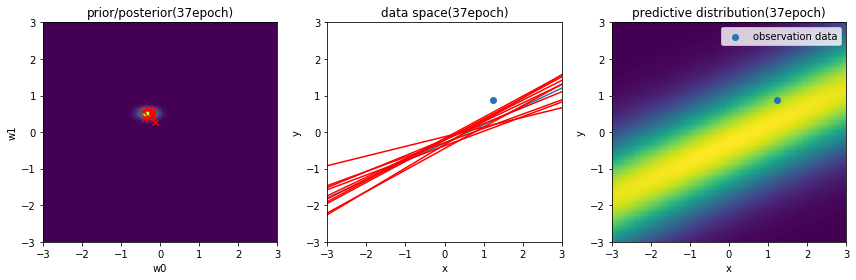

[MAP estimation] w0:-0.31, w1:0.50


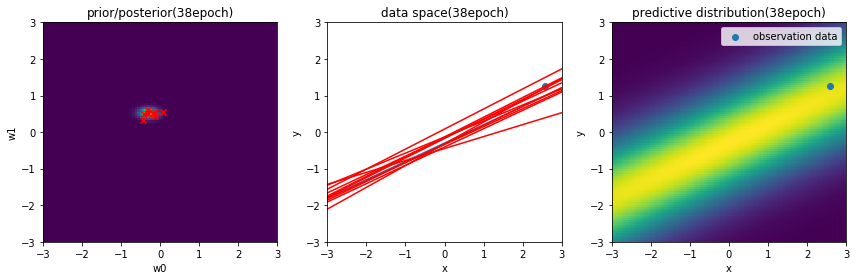

[MAP estimation] w0:-0.32, w1:0.50


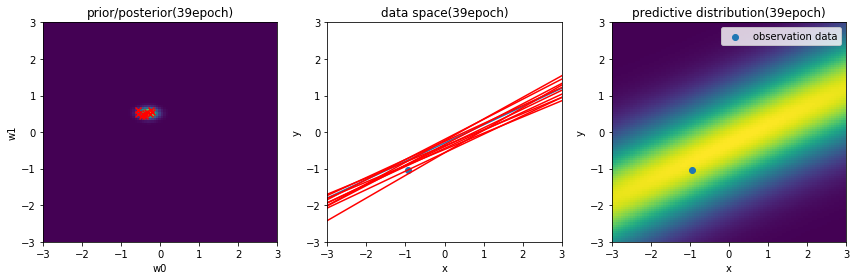

[MAP estimation] w0:-0.31, w1:0.51


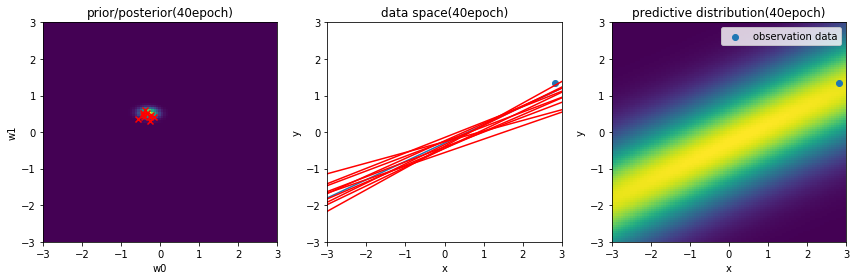

[MAP estimation] w0:-0.31, w1:0.50


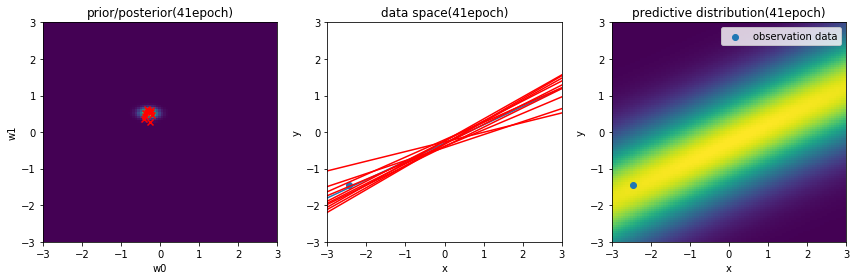

[MAP estimation] w0:-0.30, w1:0.50


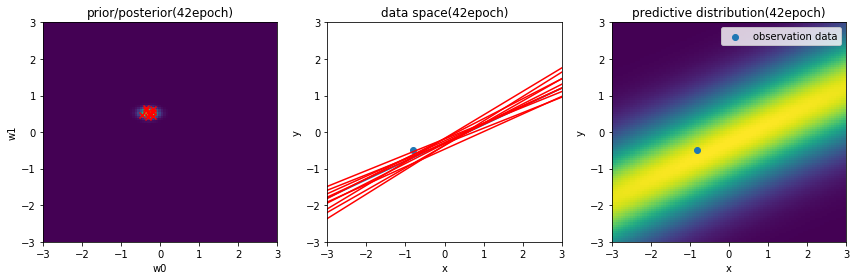

[MAP estimation] w0:-0.31, w1:0.50


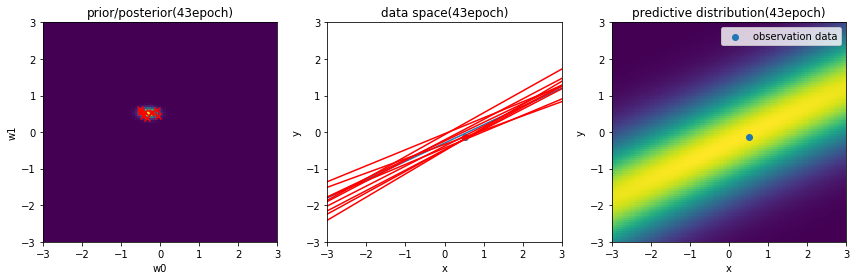

[MAP estimation] w0:-0.31, w1:0.50


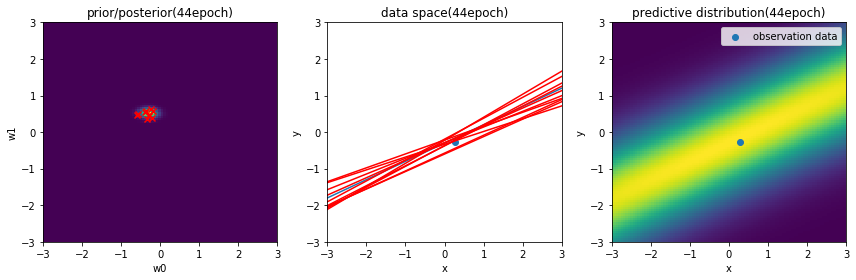

[MAP estimation] w0:-0.31, w1:0.50


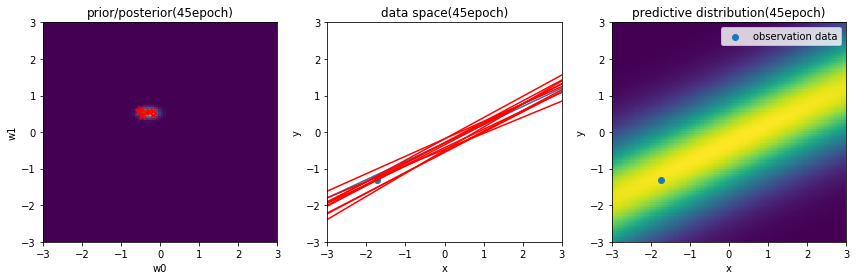

[MAP estimation] w0:-0.31, w1:0.50


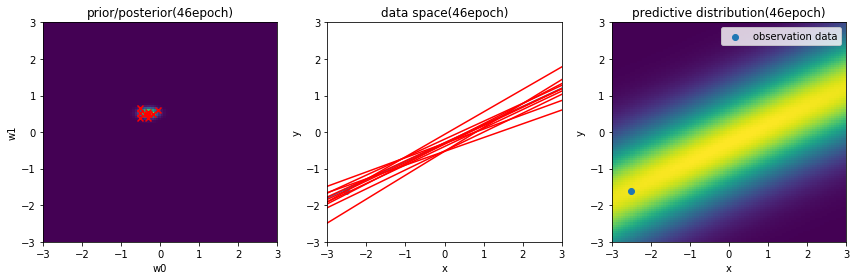

[MAP estimation] w0:-0.30, w1:0.50


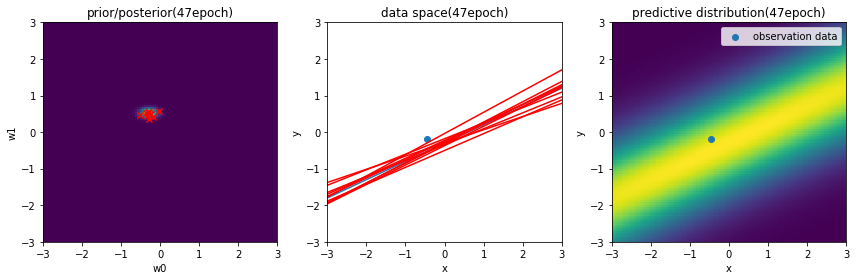

[MAP estimation] w0:-0.30, w1:0.50


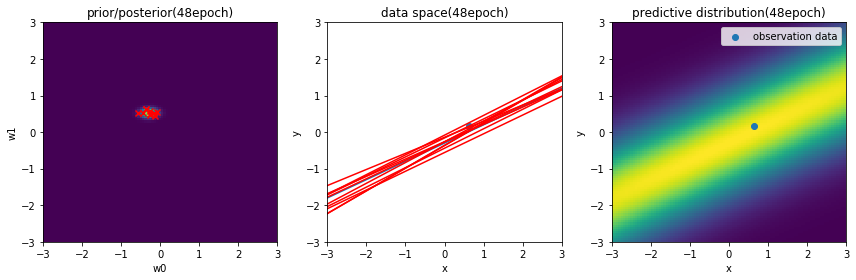

[MAP estimation] w0:-0.31, w1:0.50


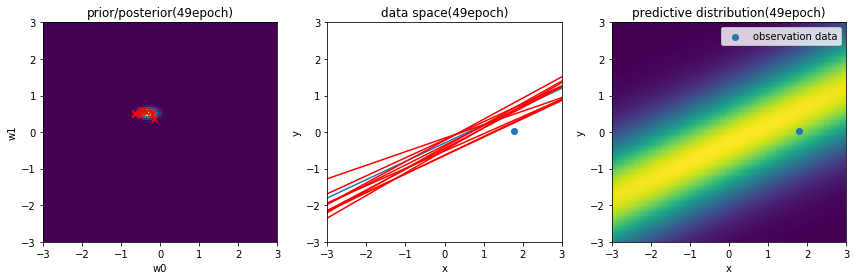

[MAP estimation] w0:-0.31, w1:0.50


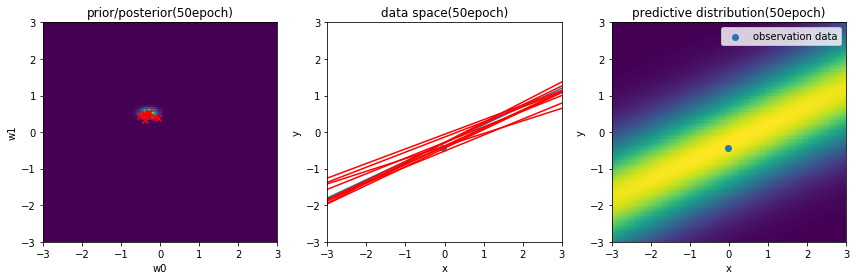

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

def phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    Phi = np.array([[1, x[0]] for x in X])
    return Phi.T

def Phi(X):
    # X is a input: [[x_1],[x_2],...,[x_n]] 
    phi = np.array([[[x[0]]] for x in X])
    #phi = np.array([[[x[0]],[x[0]**2]] for x in X])
    return np.array([[1, i] for i in phi]) # biasの追加

def maltivariate_gaussian_distribution(x, mu, sigma):
    # x(weight): D dimension maltivariate
    #        mu: D dimension
    #     sigma: D×D dimension
    exp = np.exp(-(1/2)*np.dot(np.transpose(x-mu), np.dot(np.linalg.inv(sigma),(x-mu))))
    return (1/(np.sqrt(2*np.pi)**(mu.shape[0]/2)))*(1/np.linalg.det(sigma)**(1/2))*exp

N = 100   # 個数
w0 = -0.3 # 切片パラメータ
w1 = 0.5  # 傾きパラメータ
beta = 1
alpha = 1
epsilon = 0.0000000001
epochs = 50
scope = 3

x = np.linspace(-scope,scope,N)
y = (w0 + w1 * x) + np.random.normal(0, 0.3, N)

x = np.array([[i] for i in x])
y = np.array([[i] for i in y])

prior = []
posterior = []
# データをシャッフルする
sample = np.random.permutation([[i,j] for i,j in zip(x,y)])

# モデルをデータにfitする
for n in range(epochs):    
    # 事後分布を出力する
    # データを全て使用して学習するとき
    #a = sample[:,0] + epsilon
    #b = sample[:,1] + epsilon
    # データを少しずつ増やして学習するとき（今までのデータ＋新規データで使用するとき）
    a = np.array(sample[:n+1,0]) + epsilon 
    b = np.array(sample[:n+1,1]) + epsilon
    # 新規データだけで逐次的に学習するとき（今までのデータは使用しない）
    #a = np.array([[i] for i in sample[n,0]]) + epsilon
    #b = np.array([[i] for i in sample[n,1]]) + epsilon
    
    # 事後分布
    if n == 0:
        S = np.linalg.inv(alpha+beta*np.dot(Phi(a).T, Phi(a)))
        m = np.dot(beta*np.dot(S, Phi(a).T), b)
    
    else:
        S0 = copy.deepcopy(S)
        m0 = copy.deepcopy(m)
        S = np.linalg.inv(np.linalg.inv(S0) + beta*np.dot(Phi(a).T, Phi(a)))
        m = np.dot(S, (np.dot(np.linalg.inv(S0), m0) + beta*np.dot(Phi(a).T, b)))
    
    # 事後分布から重みパラメータを確率的に選択
    multi_normal = np.random.multivariate_normal(m.ravel(), S, size=10)
    w0_pred = multi_normal[:, 0]
    w1_pred = multi_normal[:, 1]
    
    # 描画
    fig, ax = plt.subplots(1,3,figsize=(12,4))
    cordinate = []
    print('[MAP estimation] w0:{:.2f}, w1:{:.2f}'.format(m.ravel()[0], m.ravel()[1]))
    X, Y=np.meshgrid(np.linspace(-scope,scope,N),np.linspace(-scope,scope,N))
    for i in range(len(X)):
        temp = []
        for j in range(len(Y)):
            temp.append([[X[i,j]], [Y[i,j]]])
        cordinate.append(temp)
    cordinate = np.array(cordinate)

    posterior = np.array(posterior)
    posterior = np.array([maltivariate_gaussian_distribution(cordinate[i,j], m, S) for i in range(N) for j in range(N)])
    posterior = posterior.reshape(N,N)

    ax[0].pcolormesh(X, Y, posterior, cmap=None)
    ax[0].scatter(w0_pred, w1_pred, marker='x', c='r')
    ax[1].plot(np.linspace(-scope,scope,N), w0 + w1 * np.linspace(-scope,scope,N), label='true line')
    ax[1].scatter(a, b, label='observation data')
    for wp0, wp1 in zip(w0_pred, w1_pred):
        ax[1].plot(np.linspace(-scope,scope,N), wp0 + wp1 * np.linspace(-scope,scope,N), c='r')
    ax[0].set_title('prior/posterior({}epoch)'.format(n+1))
    ax[1].set_title('data space({}epoch)'.format(n+1))
    ax[0].set_xlabel('w0')
    ax[0].set_ylabel('w1')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_xlim(-scope,scope)
    ax[1].set_ylim(-scope,scope)
    
    # 予測分布を求める
    # 2次元座標を与えて各点の確率を出力する
    predictive_distribution = np.zeros((N,N))
    for i, x_i in enumerate(np.linspace(-scope,scope,N)):     # x座標
        for j, y_j in enumerate(np.linspace(-scope,scope,N)): # y座標
            x_i = np.array([[x_i]])
            y_j = np.array([[y_j]])
            pd_m = np.dot(m.T, phi(x_i))
            pd_S = beta**(-1) + np.dot(np.dot(phi(x_i).T, S), phi(x_i))
            predictive_distribution[j][i] = maltivariate_gaussian_distribution(y_j, pd_m, pd_S).ravel()[0]

    ax[2].pcolor(np.linspace(-scope,scope,N), np.linspace(-scope,scope,N), predictive_distribution)
    ax[2].scatter(a, b, label='observation data')
    ax[2].set_title('predictive distribution({}epoch)'.format(n+1))
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_xlim(-scope,scope)
    ax[2].set_ylim(-scope,scope)
    fig.tight_layout()
    plt.legend()
    plt.show()

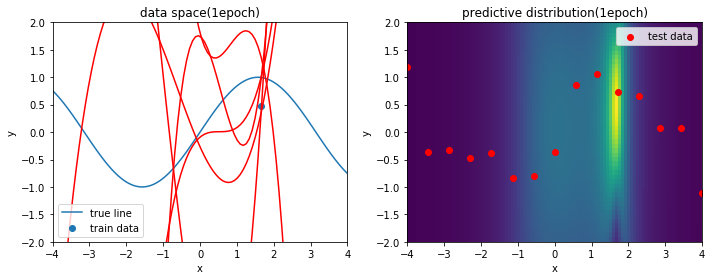

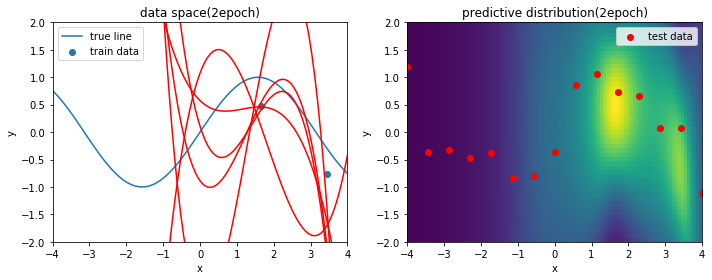

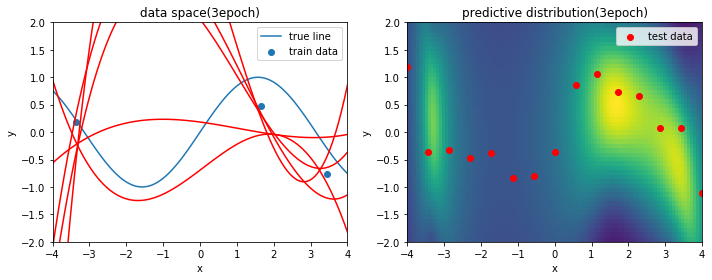

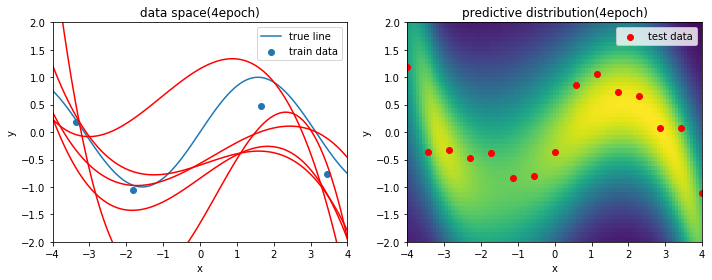

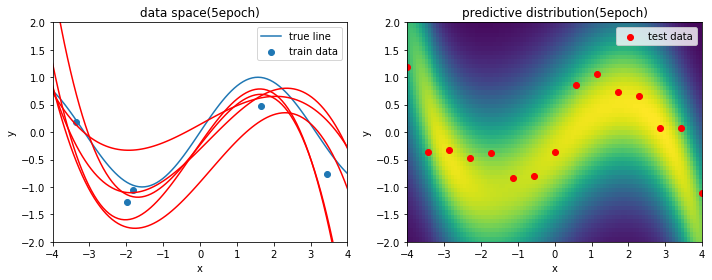

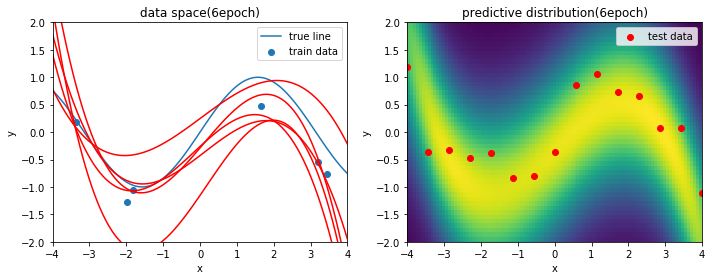

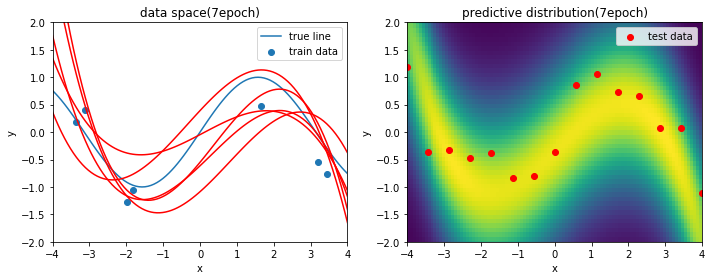

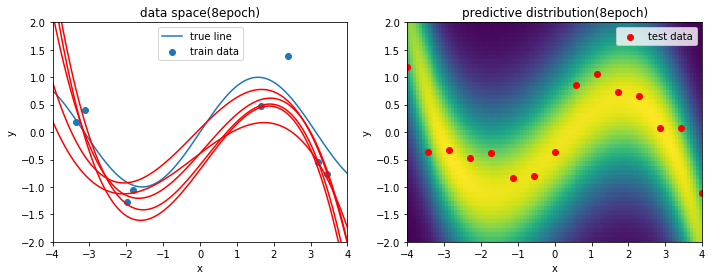

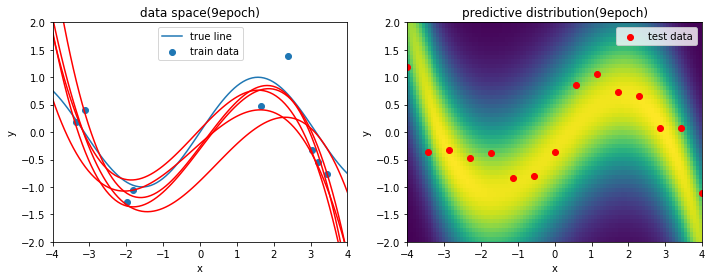

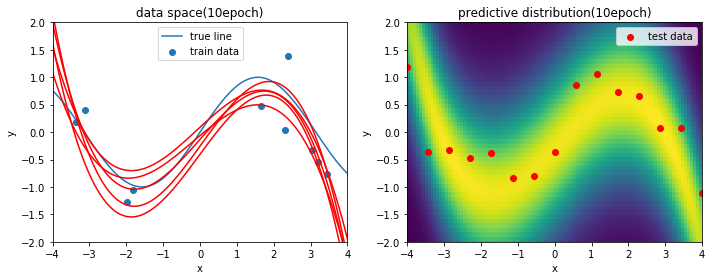

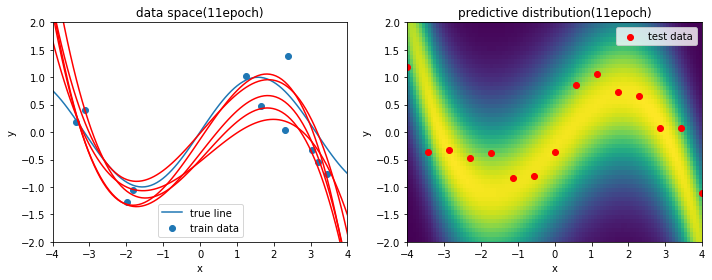

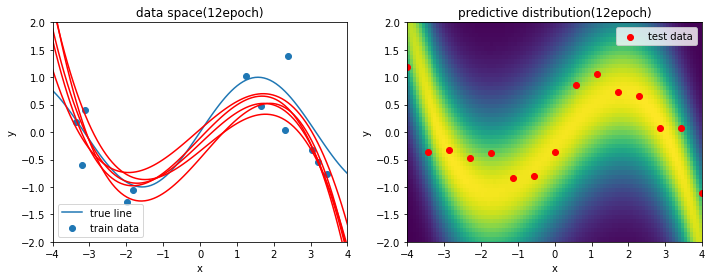

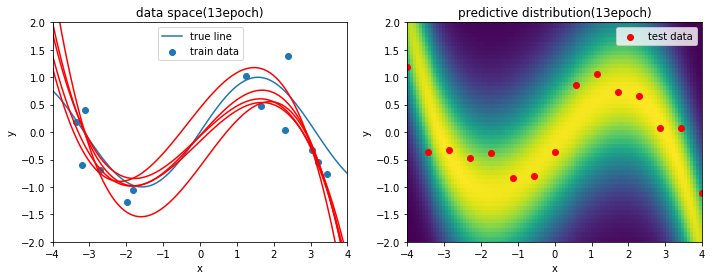

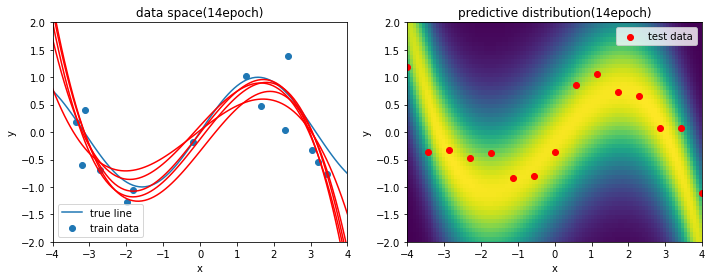

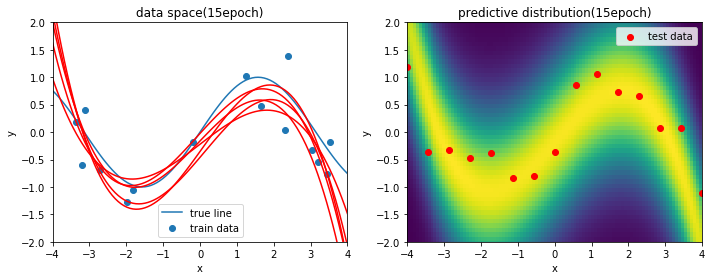

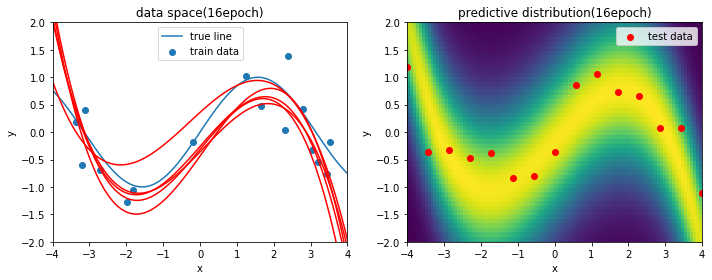

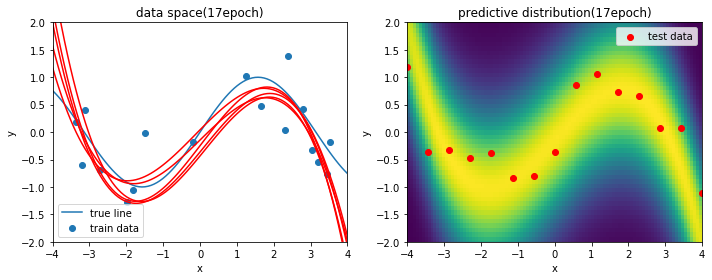

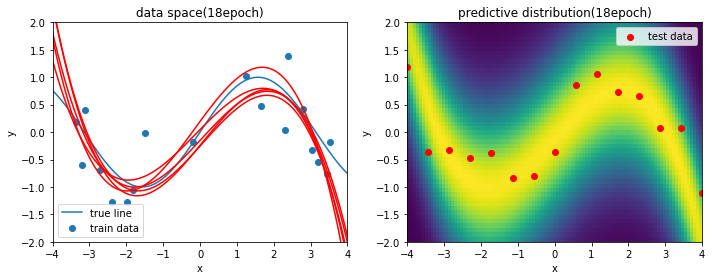

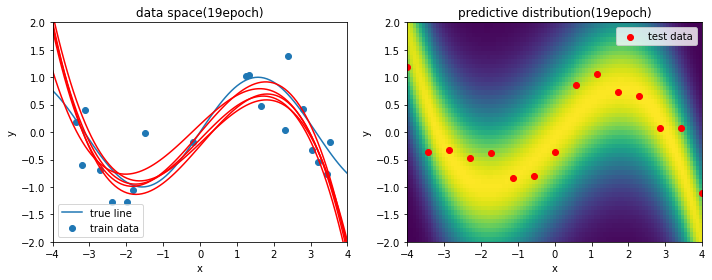

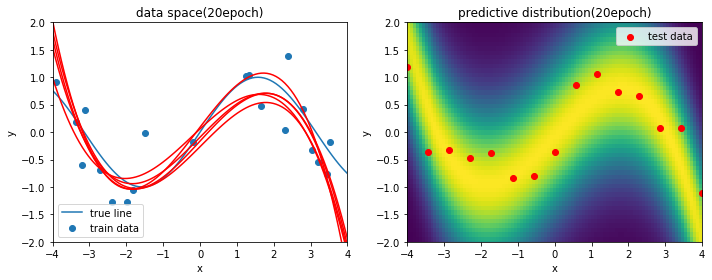

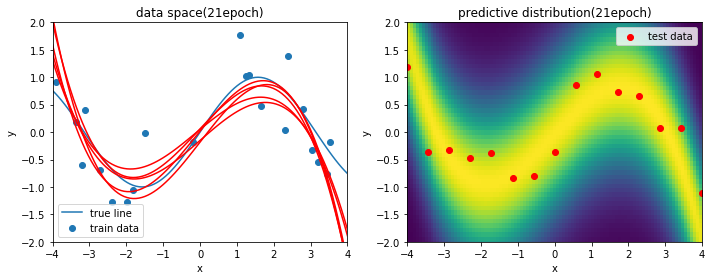

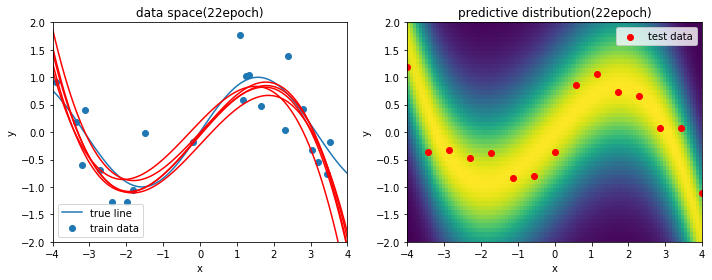

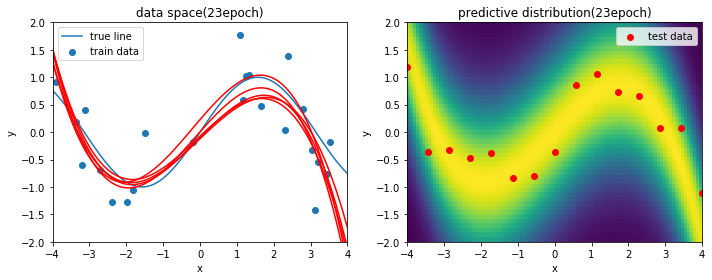

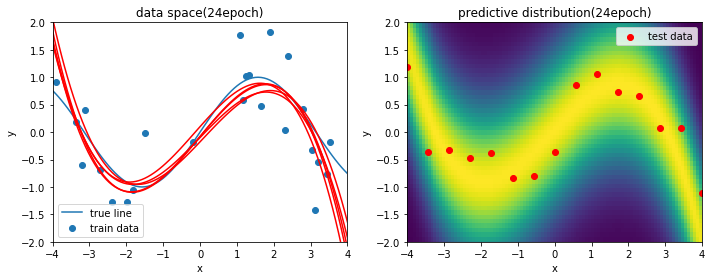

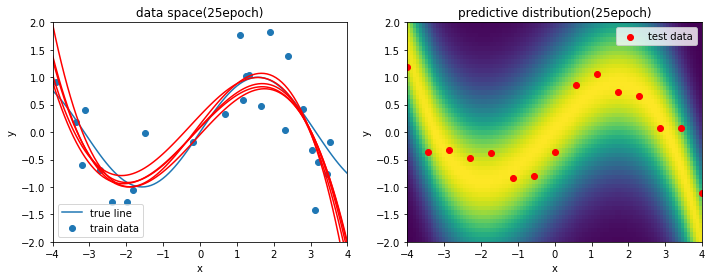

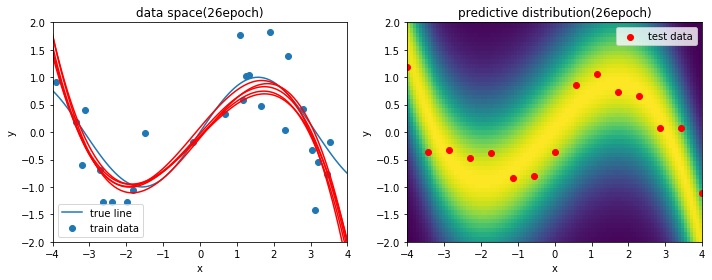

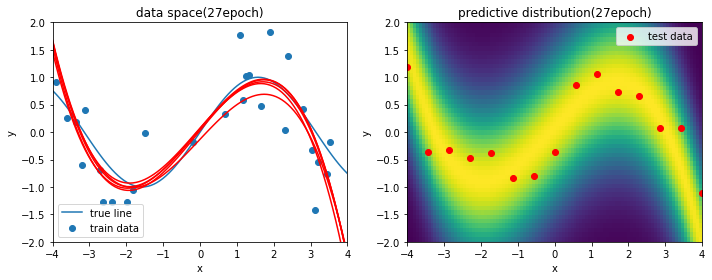

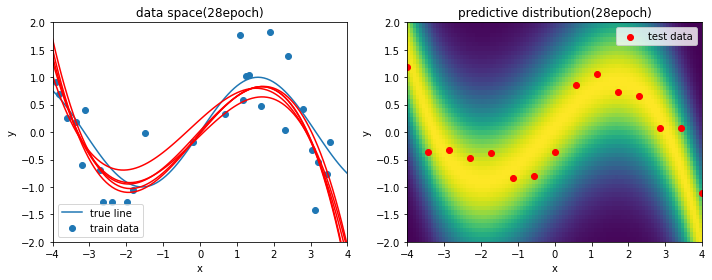

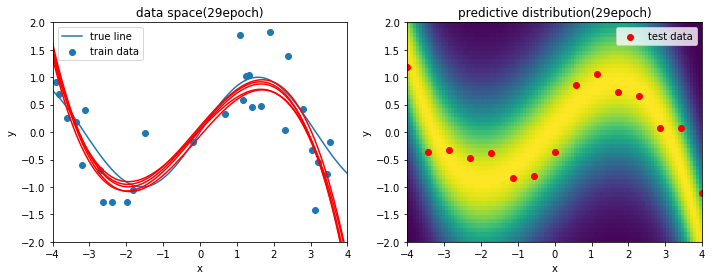

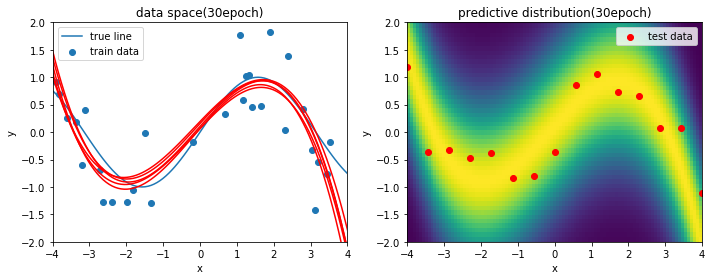

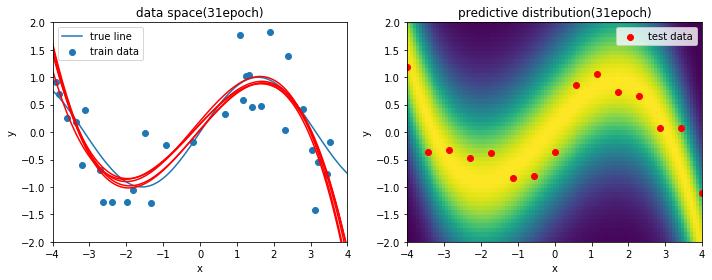

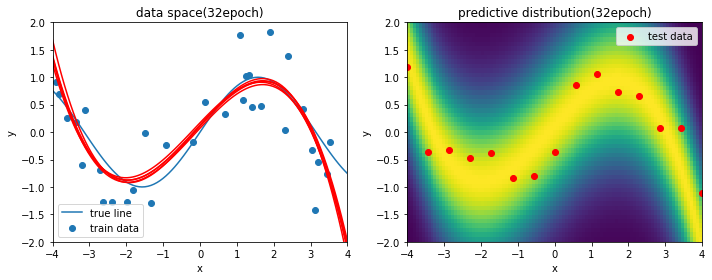

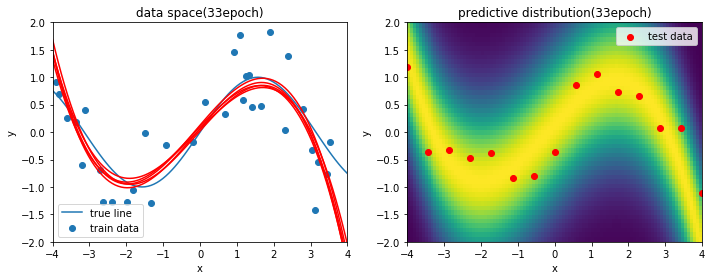

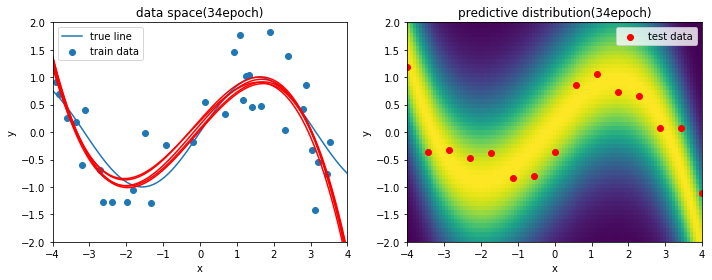

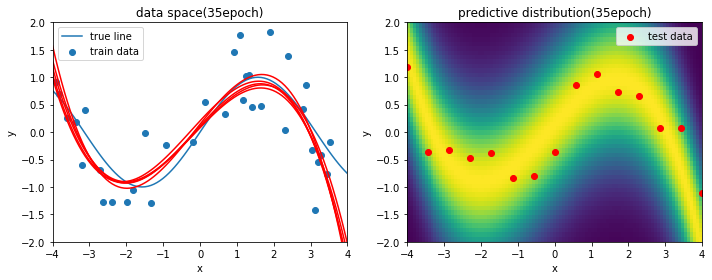

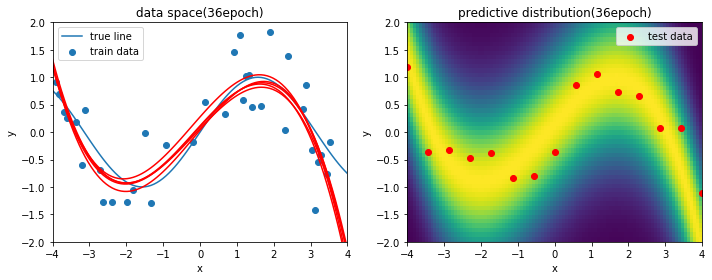

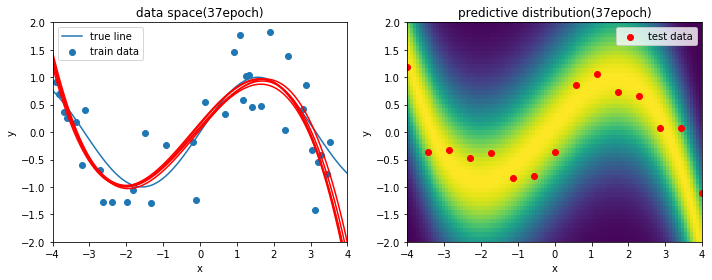

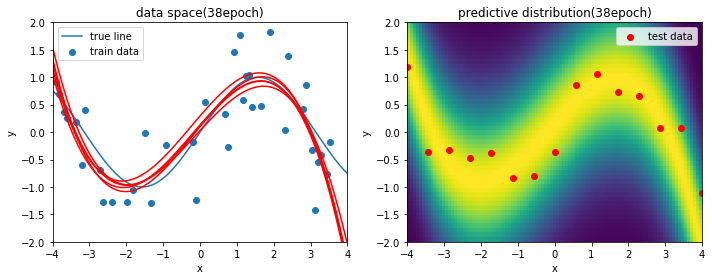

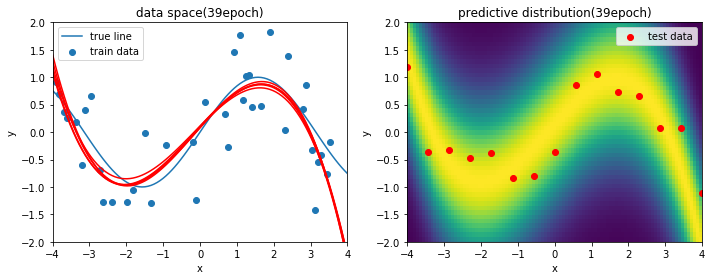

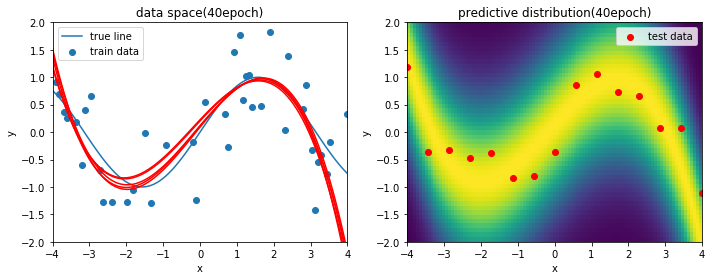

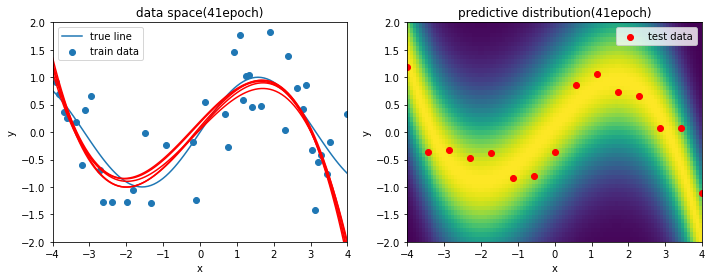

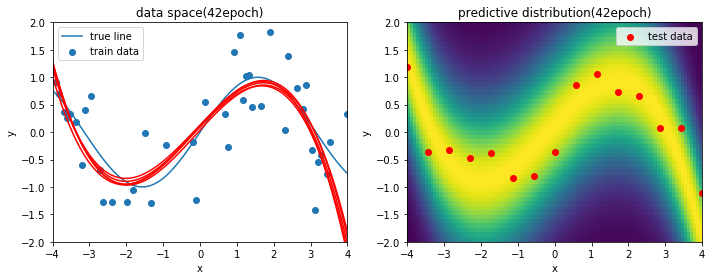

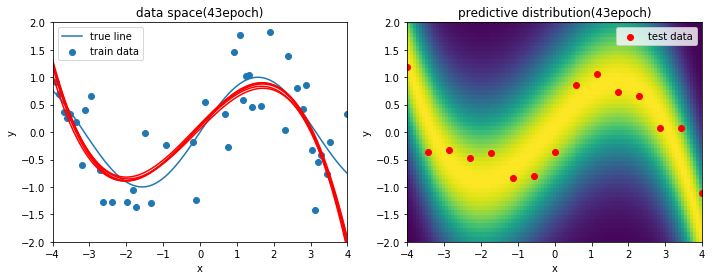

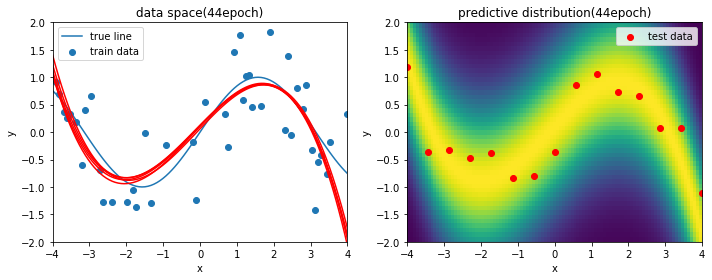

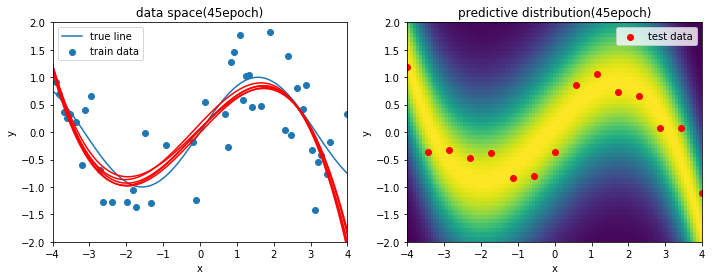

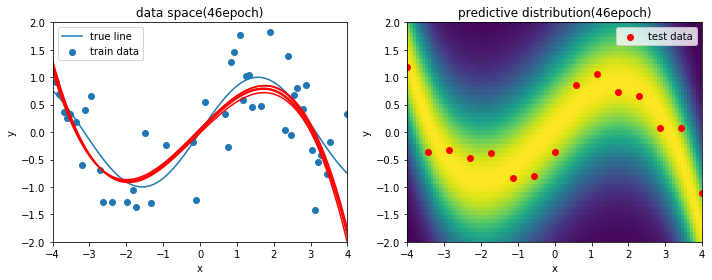

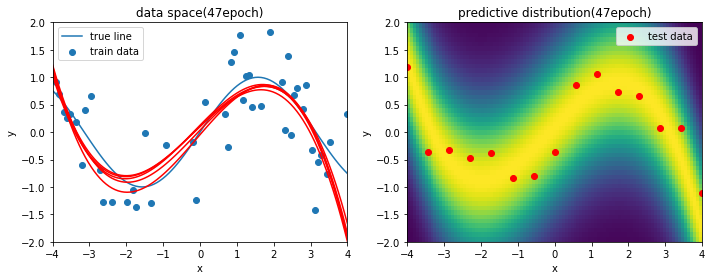

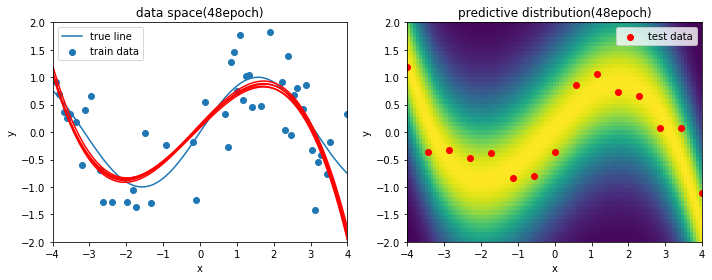

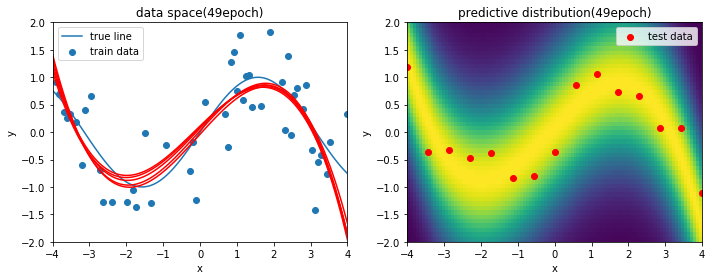

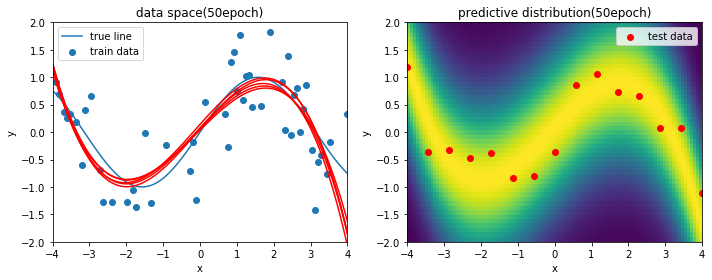

In [1]:
# sinのフィッテング
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

def phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    Phi = np.array([[1, x[0],x[0]**2,x[0]**3] for x in X])
    return Phi.T

def Phi(X):
    # X is a input: [[x_1],[x_2],...,[x_n]] 
    #phi = np.array([[[x[0]]] for x in X])
    #return np.array([[1, i] for i in phi]) # biasの追加
    Phi = np.array([[1, x[0],x[0]**2,x[0]**3] for x in X])
    return Phi

def maltivariate_gaussian_distribution(x, mu, sigma):
    # x(weight): D dimension maltivariate
    #        mu: D dimension
    #     sigma: D×D dimension
    #print('x:{}'.format(x))
    #print('np.linalg.inv(sigma):{}'.format(np.linalg.inv(sigma).shape))
    #print('(x-mu):{}'.format((x-mu).shape))
    #print('np.dot(np.linalg.inv(sigma),(x-mu)):{}'.format(np.dot(np.linalg.inv(sigma),(x-mu))))
    #print('np.dot(np.transpose(x-mu):{}'.format(np.dot(np.transpose(x-mu).shape)))
    exp = np.exp(-(1/2)*np.dot(np.transpose(x-mu), np.dot(np.linalg.inv(sigma),(x-mu))))
    return (1/(np.sqrt(2*np.pi)**(mu.shape[0]/2)))*(1/np.linalg.det(sigma)**(1/2))*exp

np.random.seed(3)
N = 100   # 個数
beta = 1
alpha = 0.1
epsilon = 0
epochs = 50
scope = 4.0

x = np.linspace(-scope,scope,N)
y = np.sin(x) + np.random.normal(0, 0.5, N)
x_test = np.linspace(-scope,scope,15)
y_test = np.sin(x_test) + np.random.normal(0, 0.5, len(x_test))

x = np.array([[i] for i in x])
y = np.array([[i] for i in y])

prior = []
posterior = []
# データをシャッフルする
sample = np.random.permutation([[i,j] for i,j in zip(x,y)])

# モデルをデータにfitする
for n in range(epochs):    
    # 事後分布を出力する
    # データを全て使用して学習するとき
    #a = sample[:,0] + epsilon
    #b = sample[:,1] + epsilon
    # データを少しずつ増やして学習するとき（今までのデータ＋新規データで使用するとき）
    a = np.array(sample[:n+1,0]) + epsilon 
    b = np.array(sample[:n+1,1]) + epsilon
    # 新規データだけで逐次的に学習するとき（今までのデータは使用しない）
    #a = np.array([[i] for i in sample[n,0]]) + epsilon
    #b = np.array([[i] for i in sample[n,1]]) + epsilon
    
    # 事後分布
    if n == 0:
        S = np.linalg.inv(beta*np.dot(Phi(a).T, Phi(a))+alpha*np.eye(4))
        m = np.dot(beta*np.dot(S, Phi(a).T), b)
    S0 = copy.deepcopy(S)
    m0 = copy.deepcopy(m)
    S = np.linalg.inv(np.linalg.inv(S0) + beta*np.dot(Phi(a).T, Phi(a)))
    m = np.dot(S, (np.dot(np.linalg.inv(S0), m0) + beta*np.dot(Phi(a).T, b)))
    
    # 事後分布から重みパラメータを確率的に選択
    multi_norm = np.random.multivariate_normal(m.ravel(), S, size=5)
    w0_pred = multi_norm[:, 0]
    w1_pred = multi_norm[:, 1]
    w2_pred = multi_norm[:, 2]
    w3_pred = multi_norm[:, 3]
    
    # 描画
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].plot(np.linspace(-scope,scope,N), np.sin(np.linspace(-scope,scope,N)), label='true line')
    ax[0].scatter(a, b, label='train data')
    range = np.linspace(-scope,scope,N)
    for wp0, wp1, wp2, wp3 in zip(w0_pred, w1_pred, w2_pred, w3_pred):
        ax[0].plot(range, wp0 + wp1 * range + wp2 * range**2 + wp3 * range**3, c='r')
    ax[0].set_title('data space({}epoch)'.format(n+1))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_xlim(-scope,scope)
    ax[0].set_ylim(-2,2)
    
    # 予測分布を求める
    # 2次元座標を与えて各点の確率を出力する
    predictive_distribution = np.zeros((N,N))
    for i, x_i in enumerate(np.linspace(-scope,scope,N)):     # x座標
        for j, y_j in enumerate(np.linspace(-scope,scope,N)): # y座標
            x_i = np.array([[x_i]])
            y_j = np.array([[y_j]])
            pd_m = np.dot(m.T, phi(x_i))
            pd_S = beta**(-1) + np.dot(np.dot(phi(x_i).T, S), phi(x_i))
            predictive_distribution[j][i] = maltivariate_gaussian_distribution(y_j, pd_m, pd_S).ravel()[0]

    ax[1].pcolor(np.linspace(-scope,scope,N), np.linspace(-scope,scope,N), predictive_distribution)
    #ax[1].scatter(a, b, label='observation data')
    ax[1].scatter(x_test,y_test,label='test data',color='r')
    ax[1].set_title('predictive distribution({}epoch)'.format(n+1))
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_xlim(-scope,scope)
    ax[1].set_ylim(-2,2)
    fig.tight_layout()
    ax[0].legend()
    ax[1].legend()
    plt.show()

finished


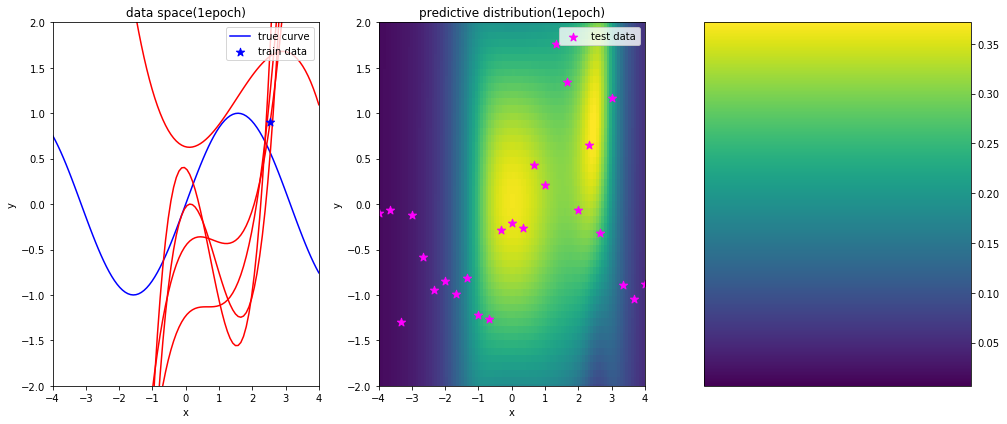

In [15]:
# ベイズ推定を用いたsin関数の回帰
# numpy=1.17では動かない（1.15では動作確認済み）
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import matplotlib.animation as anim
import copy

def phi(X):
    # X      : [[x0],[x1],...]
    # return : [[phi_1(x),...,phi_n(x)] for x in X]
    
    Phi = np.array([[1,x[0],x[0]**2,x[0]**3] for x in X]) # 3 poliminal
    #Phi = np.array([[1,x[0],x[0]**2,x[0]**3,x[0]**4,x[0]**5,x[0]**6,x[0]**7,x[0]**8,x[0]**9] for x in X]) #  poliminal
    return Phi.T

def Phi(X):
    return phi(X).T

def maltivariate_gaussian_distribution(x, mu, sigma):
    # x(weight): D dimension maltivariate
    #        mu: D dimension
    #     sigma: D×D dimension
    exp = np.exp(-(1/2)*np.dot(np.transpose(x-mu), np.dot(np.linalg.inv(sigma),(x-mu))))
    return (1/(np.sqrt(2*np.pi)**(mu.shape[0]/2)))*(1/np.linalg.det(sigma)**(1/2))*exp

# モデルをデータにfitする
def update(n, ax, sample, isBatchLearning, batchsize):
    global S, m
    ax[0].cla()
    ax[1].cla()
    ax[2].cla()
    
    if isBatchLearning:
        # データを全て使用して学習するとき
        a = sample[:2,0] + epsilon
        b = sample[:2,1] + epsilon
    else:
        # 新規データだけで逐次的に学習するとき（今までのデータは使用しない）
        a = np.array(sample[:(n+1)*batchsize, 0]) + epsilon
        b = np.array(sample[:(n+1)*batchsize, 1]) + epsilon
        #b = np.array([[i] for i in sample[:(n+1)*batchsize, 1]]) + epsilon
        #b = np.array([[i] for i in sample[n,1]]) + epsilon
    
    # 事後分布
    if n == 0:
        temp = beta*np.dot(Phi(a).T, Phi(a))
        S = np.linalg.inv(temp + alpha*np.eye(len(temp)))
        m = np.dot(beta*np.dot(S, Phi(a).T), b)
    S0 = copy.deepcopy(S)
    m0 = copy.deepcopy(m)
    S = np.linalg.inv(np.linalg.inv(S0) + beta*np.dot(Phi(a).T, Phi(a)))
    m = np.dot(S, (np.dot(np.linalg.inv(S0), m0) + beta*np.dot(Phi(a).T, b)))
    
    # 事後分布から重みパラメータを確率的に選択する
    multi_norm = np.random.multivariate_normal(m.ravel(), S, size=5)
    
    # 描画
    ax[0].plot(np.linspace(-scope,scope,N), np.sin(np.linspace(-scope,scope,N)), label='true curve',color='b', zorder=1)
    #ax[0].scatter(a, b, label='train data', color='b',marker='*',s=75,zorder=3)
    if isBatchLearning:
        ax[0].scatter(sample[:2,0], sample[:2,1], label='train data', color='b',marker='*',s=75,zorder=3)
    else:
        ax[0].scatter(sample[:(n+1)*batchsize,0], sample[:(n+1)*batchsize,1], label='train data', color='b',marker='*',s=75,zorder=3)
    r = np.linspace(-scope,scope,N)
    for w in multi_norm:
        ax[0].plot(r, [np.dot(w, [t**i for i in range(len(w))]) for t in r], c='r', zorder=2)
    ax[0].set_title('data space({}epoch)'.format(n+1))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_xlim(-scope,scope)
    ax[0].set_ylim(-2,2)
    
    # 予測分布を求める
    # 2次元座標を与えて各点の確率を出力する
    predictive_distribution = np.zeros((N,N))
    for i, x_i in enumerate(np.linspace(-scope,scope,N)):     # x座標
        for j, y_j in enumerate(np.linspace(-scope,scope,N)): # y座標
            x_i = np.array([[x_i]])
            y_j = np.array([[y_j]])
            pd_m = np.dot(m.T, phi(x_i))
            pd_S = beta**(-1) + np.dot(np.dot(phi(x_i).T, S), phi(x_i))
            predictive_distribution[j][i] = maltivariate_gaussian_distribution(y_j, pd_m, pd_S).ravel()[0]

    im = ax[1].pcolor(np.linspace(-scope,scope,N), np.linspace(-scope,scope,N), predictive_distribution)
    #cbar = ax[1].colorbar(ticks=[]) #カラーバーのticksをかかない。
    #cbar.set_label('Probability', fontsize=16,fontweight='bold')
    ax[1].scatter(x_test,y_test,label='test data',color='magenta',marker='*',s=75)
    ax[1].set_title('predictive distribution({}epoch)'.format(n+1))
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_xlim(-scope,scope)
    ax[1].set_ylim(-2,2)
    fig.tight_layout()
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    
    # カラーバーの設定
    #axpos = ax[1].get_position()
    #cbar_ax = fig.add_axes([0.87, axpos.y0, 0.02, axpos.height])
    #norm = colors.Normalize(vmin=df['price'].min(),vmax=df['price'].max())
    #mappable = ScalarMappable(cmap='')
    #mappable._A = []
    #fig.colorbar(mappable, cax=ax[2])
    fig.colorbar(im, cax=ax[2])


if __name__ == '__main__':
    np.random.seed(100)
    N = 100                 # 学習データの数
    N_test = 25             # テストデータの数
    beta = 0.5              # 既知と仮定
    alpha = 1               # ハイパーパラメータ
    epsilon = 0.000001      # ランク落ちのため
    epochs = 50             # 試行回数
    scope = 4.0             # データの定義域 -scope から scope まで
    isBatchLearning = False
    batchsize = 1
    interval = 1000
    frames = 2

    x = np.linspace(-scope,scope,N)
    y = np.sin(x) + np.random.normal(0, beta, N)
    x_test = np.linspace(-scope,scope,N_test)
    y_test = np.sin(x_test) + np.random.normal(0, beta, len(x_test))

    x = np.array([[i] for i in x])
    y = np.array([[i] for i in y])

    # データをシャッフルする
    sample = np.random.permutation([[i,j] for i,j in zip(x,y)])
    fig, ax = plt.subplots(1,3,figsize=(14,6))
    fargs = [ax, sample, isBatchLearning, batchsize]
    ani = anim.FuncAnimation(fig, update, fargs=fargs, interval=interval, frames=frames)
    ani.save("testtest_Batch_{}_batchsize_{}.gif".format(isBatchLearning, batchsize), writer = 'imagemagick')
    print('finished')

0
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

TypeError: No loop matching the specified signature and casting
was found for ufunc inv

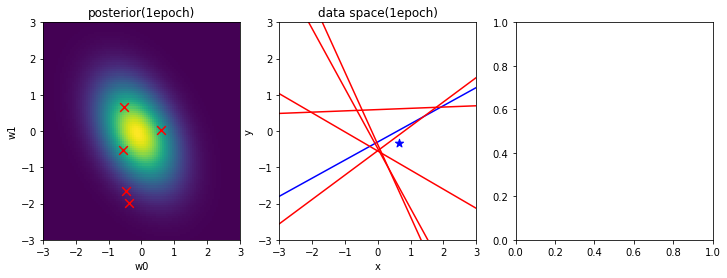

In [15]:
# ベイズ推定を用いた線形回帰
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import copy

def phi(X):
    # X      : [[x0],[x1],...]
    # return : [[phi_1(x),...,phi_n(x)] for x in X]
    
    Phi = np.array([[1,x[0]] for x in X]) # 9th poliminal
    return Phi.T

def Phi(X):
    return phi(X).T

def maltivariate_gaussian_distribution(x, mu, sigma):
    # x(weight): D dimension maltivariate
    #        mu: D dimension
    #     sigma: D×D dimension
    print(type(np.dot(np.linalg.inv(sigma),(x-mu))))
    exp = np.exp(-(1/2)*np.dot(np.transpose(x-mu), np.dot(np.linalg.inv(sigma),(x-mu))))
    return (1/(np.sqrt(2*np.pi)**(mu.shape[0]/2)))*(1/np.linalg.det(sigma)**(1/2))*exp

# モデルをデータにfitする
def update(n, ax, sample):
    print(n)
    global S, m, posterior, prior, w0, w1
    ax[0].cla()
    ax[1].cla()
    ax[2].cla()
    
    # データを全て使用して学習するとき
    #a = sample[:,0] + epsilon
    #b = sample[:,1] + epsilon
    
    # データを少しずつ増やして学習するとき（今までのデータ＋新規データで使用するとき）
    #a = np.array(sample[:n+1,0]) + epsilon 
    #b = np.array(sample[:n+1,1]) + epsilon
    
    # 新規データだけで逐次的に学習するとき（今までのデータは使用しない）
    a = np.array([[i] for i in sample[n,0]]) + epsilon
    b = np.array([[i] for i in sample[n,1]]) + epsilon
    
    # 事後分布
    if n == 0:
        temp = beta*np.dot(Phi(a).T, Phi(a))
        S = np.linalg.inv(temp + alpha*np.eye(len(temp)))
        m = np.dot(beta*np.dot(S, Phi(a).T), b)
    S0 = copy.deepcopy(S)
    m0 = copy.deepcopy(m)
    S = np.linalg.inv(np.linalg.inv(S0) + beta*np.dot(Phi(a).T, Phi(a)))
    m = np.dot(S, (np.dot(np.linalg.inv(S0), m0) + beta*np.dot(Phi(a).T, b)))

    # 事後分布から重みパラメータを確率的に選択
    multi_normal = np.random.multivariate_normal(m.ravel(), S, size=5)
    w0_pred = multi_normal[:, 0]
    w1_pred = multi_normal[:, 1]
    
    # 描画
    cordinate = []
    X, Y=np.meshgrid(np.linspace(-scope,scope,N),np.linspace(-scope,scope,N))
    for i in range(len(X)):
        temp = []
        for j in range(len(Y)):
            temp.append([[X[i,j]], [Y[i,j]]])
        cordinate.append(temp)
    cordinate = np.array(cordinate)

    posterior = np.array(posterior)
    posterior = np.array([maltivariate_gaussian_distribution(cordinate[i,j], m, S) for i in range(N) for j in range(N)])
    posterior = posterior.reshape(N,N)

    ax[0].pcolormesh(X, Y, posterior, cmap=None)
    ax[0].scatter(w0_pred, w1_pred, marker='x', c='r', label='sample',s=75)
    ax[1].plot(np.linspace(-scope,scope,N), w0 + w1 * np.linspace(-scope,scope,N), label='true line',color='b', zorder=1)
    ax[1].scatter(a, b, label='train data', color='b',marker='*',s=75,zorder=3)
    for k, (wp0, wp1) in enumerate(zip(w0_pred, w1_pred)):
        ax[1].plot(np.linspace(-scope,scope,N), wp0 + wp1 * np.linspace(-scope,scope,N), label='predicted line' if k==0 else "", c='r', zorder=2)
    ax[0].set_title('posterior({}epoch)'.format(n+1))
    ax[1].set_title('data space({}epoch)'.format(n+1))
    ax[0].set_xlabel('w0')
    ax[0].set_ylabel('w1')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_xlim(-scope,scope)
    ax[1].set_ylim(-scope,scope)
    
    # 予測分布を求める
    # 2次元座標を与えて各点の確率を出力する
    predictive_distribution = np.zeros((N,N))
    for i, x_i in enumerate(np.linspace(-scope,scope,N)):     # x座標
        for j, y_j in enumerate(np.linspace(-scope,scope,N)): # y座標
            x_i = np.array([[x_i]])
            y_j = np.array([[y_j]])
            pd_m = np.dot(m.T, phi(x_i))
            pd_S = beta**(-1) + np.dot(np.dot(phi(x_i).T, S), phi(x_i))
            predictive_distribution[j][i] = maltivariate_gaussian_distribution(y_j, pd_m, pd_S).ravel()[0]

    ax[2].pcolor(np.linspace(-scope,scope,N), np.linspace(-scope,scope,N), predictive_distribution)
    ax[2].scatter(x_test,y_test,label='test data',color='magenta',marker='*',s=75)
    ax[2].set_title('predictive distribution({}epoch)'.format(n+1))
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_xlim(-scope,scope)
    ax[2].set_ylim(-scope,scope)
    fig.tight_layout()
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    ax[2].legend(loc='upper right')

if __name__ == '__main__':
    np.random.seed(0)
    N = 100              # 学習データの個数
    N_test = 25          # テストデータの個数
    beta = 0.5           # 既知であると仮定
    alpha = 1            # ハイパーパラメータ
    epsilon = 0.000001   # ランク落ちのための値
    epochs = 50          # 試行回数
    scope = 3.0          # データの定義域 -scope から scope まで
    w0 = -0.3            # 直線の切片パラメータ
    w1 = 0.5             # 直線の傾きパラメータ    
    prior = []
    posterior = []
    
    x = np.linspace(-scope,scope,N)
    y = (w0 + w1 * x) + np.random.normal(0, beta, N)
    x_test = np.linspace(-scope,scope,N_test)
    y_test = np.sin(x_test) + np.random.normal(0, beta, len(x_test))

    x = np.array([[i] for i in x])
    y = np.array([[i] for i in y])

    # データをシャッフルする
    sample = np.random.permutation([[i,j] for i,j in zip(x,y)])
    fig, ax = plt.subplots(1,3,figsize=(12,4))
    ani = anim.FuncAnimation(fig, update, fargs = (ax, sample), interval = 400, frames = 3)
    ani.save("sequentially.gif", writer = 'imagemagick')
    print('finished')